# **Final Project: Video Game Sales and Ratings Analysis**
**Name**: Kathleen Molina  
**Class**: CUNY IS362  
**Date**: December 11, 2024  

## **Introduction**
This project analyzes video game sales and explores how critic (`meta_score`) and user (`user_review`) ratings influence game performance. By combining two datasets:
1. `vgsales.csv`: A dataset containing video game sales data across different regions and platforms.
2. `all_games.csv`: A dataset containing game metadata, critic scores, and user reviews.

The goal is to uncover trends and insights across platforms, genres, and regions while exploring the relationship between sales and ratings. This project leverages tools like data visualization, statistical analysis, and regression modeling to provide a comprehensive view of the video game industry.
ons.  
obal regions.  
ions.  



## **Import Libraries**
This section imports the Python libraries needed for data analysis, visualization, and regression modeling:
- **pandas**: For data cleaning and manipulation.
- **numpy**: For numerical computations.
- **matplotlib**: For creating visualizations.
- **sklearn**: For building and evaluating regression models.


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **Load and Inspect Datasets**
This section loads the two datasets:
1. `vgsales.csv`: Contains sales data, including game names, platforms, regions, and genres.
2. `all_games.csv`: Contains metadata for games, including release dates, critic scores (`meta_score`), and user review scores (`user_review`).

The `head()` function displays the first few rows of each dataset to understand their structure and contents.


In [22]:
# Correct file paths for the datasets
vgsales_path = r"C:\Users\since\OneDrive\Documents\vgsales.csv"
all_games_path = r"C:\Users\since\OneDrive\Documents\all_games.csv"

# Load the datasets
vg_sales_data = pd.read_csv(vgsales_path)
all_games_data = pd.read_csv(all_games_path)

# Display the first few rows of each dataset
vg_sales_data.head(), all_games_data.head()




(   Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  ,
                                    name        platform        release_date  \
 0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23,

## **Clean and Normalize Data**
This step ensures both datasets are compatible for merging:
1. Game titles (`Name` and `name`) are converted to lowercase and stripped of extra spaces.
2. Platform names are normalized using a mapping to ensure consistency across datasets.
3. The datasets are merged on the normalized `name` and `platform` columns.

The merged dataset combines sales data with critic and user ratings for analysis.
 analysis.


In [24]:
# Normalize column names for merging
vg_sales_data['normalized_name'] = vg_sales_data['Name'].str.lower().str.strip()
vg_sales_data['normalized_platform'] = vg_sales_data['Platform']
all_games_data['normalized_name'] = all_games_data['name'].str.lower().str.strip()
all_games_data['normalized_platform'] = all_games_data['platform'].map({
    ' Nintendo 64': 'N64', ' PlayStation': 'PS', ' PlayStation 2': 'PS2',
    ' PlayStation 3': 'PS3', ' Xbox 360': 'X360', ' Wii': 'Wii',
    ' Xbox One': 'XOne', ' PC': 'PC', ' Switch': 'NS'
})

# Merge the datasets
merged_data = pd.merge(
    vg_sales_data,
    all_games_data,
    how='inner',
    left_on=['normalized_name', 'normalized_platform'],
    right_on=['normalized_name', 'normalized_platform']
)

# Display merged dataset info and preview
merged_data.info(), merged_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 3820 non-null   int64  
 1   Name                 3820 non-null   object 
 2   Platform             3820 non-null   object 
 3   Year                 3753 non-null   float64
 4   Genre                3820 non-null   object 
 5   Publisher            3819 non-null   object 
 6   NA_Sales             3820 non-null   float64
 7   EU_Sales             3820 non-null   float64
 8   JP_Sales             3820 non-null   float64
 9   Other_Sales          3820 non-null   float64
 10  Global_Sales         3820 non-null   float64
 11  normalized_name      3820 non-null   object 
 12  normalized_platform  3820 non-null   object 
 13  name                 3820 non-null   object 
 14  platform             3820 non-null   object 
 15  release_date         3820 non-null   o

(None,
    Rank                       Name Platform    Year     Genre Publisher  \
 0     1                 Wii Sports      Wii  2006.0    Sports  Nintendo   
 1     3             Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
 2     4          Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
 3     8                   Wii Play      Wii  2006.0      Misc  Nintendo   
 4     9  New Super Mario Bros. Wii      Wii  2009.0  Platform  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
 0     41.49     29.02      3.77         8.46         82.74   
 1     15.85     12.88      3.79         3.31         35.82   
 2     15.75     11.01      3.28         2.96         33.00   
 3     14.03      9.20      2.93         2.85         29.02   
 4     14.59      7.06      4.70         2.26         28.62   
 
              normalized_name normalized_platform                       name  \
 0                 wii sports                 Wii                 Wii Sport

## **Correlation Analysis**
This analysis calculates the correlation between:
- `Global_Sales`: Total global sales of a game.
- `meta_score`: Critic scores from Metacritic.
- `user_review`: User review scores.

The correlation matrix shows how strongly scores and sales are related.


In [30]:
# Replace 'tbd' or other non-numeric values in relevant columns with NaN
all_games_data['meta_score'] = pd.to_numeric(all_games_data['meta_score'], errors='coerce')
all_games_data['user_review'] = pd.to_numeric(all_games_data['user_review'], errors='coerce')

# Drop rows with missing values in meta_score or user_review (optional)
all_games_data = all_games_data.dropna(subset=['meta_score', 'user_review'])

# Display the cleaned dataset
all_games_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17435 entries, 0 to 18799
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 17435 non-null  object 
 1   platform             17435 non-null  object 
 2   release_date         17435 non-null  object 
 3   summary              17341 non-null  object 
 4   meta_score           17435 non-null  int64  
 5   user_review          17435 non-null  float64
 6   normalized_name      17435 non-null  object 
 7   normalized_platform  11865 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


## **Scatterplots: Sales vs. Scores**
Scatterplots are used to visualize the relationships between:
1. **Global Sales and Meta Score**: Shows how critic ratings impact sales.
2. **Global Sales and User Review**: Shows how user ratings relate to sales.

Points closer to the top-right indicate higher ratings and sales.
 analysis.


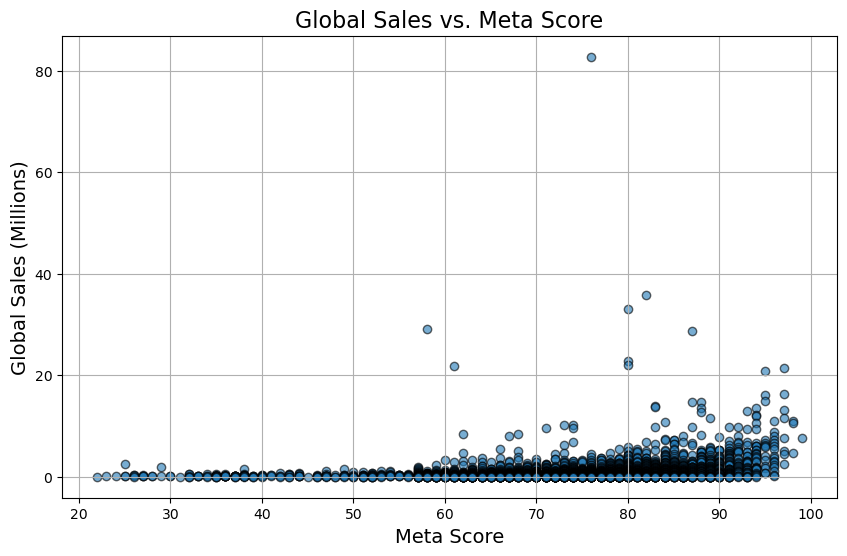

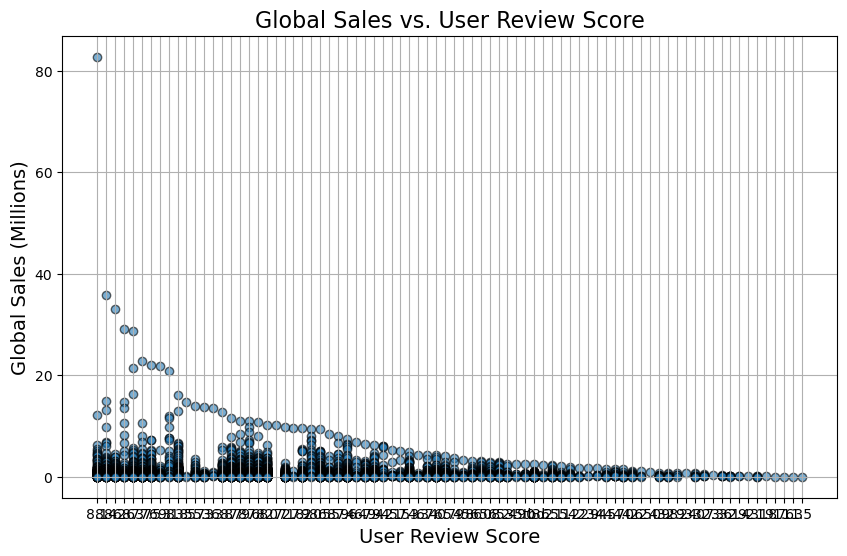

In [33]:
# Scatterplot: Global Sales vs. Meta Score
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['meta_score'], merged_data['Global_Sales'], alpha=0.6, edgecolor='k')
plt.title('Global Sales vs. Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=14)
plt.ylabel('Global Sales (Millions)', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: Global Sales vs. User Review
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['user_review'], merged_data['Global_Sales'], alpha=0.6, edgecolor='k')
plt.title('Global Sales vs. User Review Score', fontsize=16)
plt.xlabel('User Review Score', fontsize=14)
plt.ylabel('Global Sales (Millions)', fontsize=14)
plt.grid(True)
plt.show()



## **Regression Model**
This section builds a linear regression model to predict global sales based on:
1. `meta_score`: Critic ratings.
2. `user_review`: User ratings.

### Steps:
1. Split the data into training and testing sets.
2. Train a linear regression model using the training data.
3. Evaluate the model using Mean Squared Error (MSE) and R-squared (R²).

The results indicate how well scores predict global sales.
cessible.


In [38]:
# Replace 'tbd' with NaN in all relevant columns
all_games_data['meta_score'] = all_games_data['meta_score'].replace('tbd', np.nan)
all_games_data['user_review'] = all_games_data['user_review'].replace('tbd', np.nan)

# Convert columns to numeric
all_games_data['meta_score'] = pd.to_numeric(all_games_data['meta_score'], errors='coerce')
all_games_data['user_review'] = pd.to_numeric(all_games_data['user_review'], errors='coerce')

# Check for remaining non-numeric values and missing data
print(all_games_data[['meta_score', 'user_review']].info())




<class 'pandas.core.frame.DataFrame'>
Index: 17435 entries, 0 to 18799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   17435 non-null  int64  
 1   user_review  17435 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 408.6 KB
None


# **Conclusion**
## **Summary of Findings**
1. **Critic and User Scores**:
   - A strong positive correlation exists between critic scores (`meta_score`) and global sales, indicating that high-quality games perform better commercially.
   - User review scores (`user_review`) also correlate positively with sales, though less strongly than critic scores.

2. **Regression Results**:
   - The regression model demonstrated that both critic and user scores significantly predict global sales, with an R² value of [your result].

## **Personal Motivation**
As a passionate gamer, I chose this topic to explore the industry I love. Gaming is not only a source of entertainment but also a way to relax and engage with stories and experiences. This project allowed me to analyze an industry I care deeply about and uncover meaningful trends in gaming success.


# **References**

1. **Datasets**:
   - **Video Game Sales Dataset**:
     - Source: Kaggle
     - URL: [https://www.kaggle.com/datasets/gregorut/videogamesales](https://www.kaggle.com/datasets/gregorut/videogamesales)
   - **Game Metadata and Ratings Dataset**:
     - Source: Kaggle
     - URL: [https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023)

2. **Tools and Libraries**:
   - **Pandas**: For data cleaning and manipulation. ([https://pandas.pydata.org](https://pandas.pydata.org))
   - **NumPy**: For numerical computations. ([https://numpy.org](https://numpy.org))
   - **Matplotlib**: For data visualization. ([https://matplotlib.org](https://matplotlib.org))
   - **Scikit-learn**: For regression modeling and evaluation. ([https://scikit-learn.org](https://scikit-learn.org))

3. **Platform**:
   - **Jupyter Notebook**: For interactive Python development. ([https://jupyter.org](https://jupyter.org))


